In [1]:
# 필요 라이브러리 호출
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
titan_df = pd.read_csv('D:/pythonTest/train.csv')
print(titan_df.head(2))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  


In [3]:
# 데이터 정보확인
print(titan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# 결측값 확인
titan_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# 일반 bar-chart를 통해 시각화
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

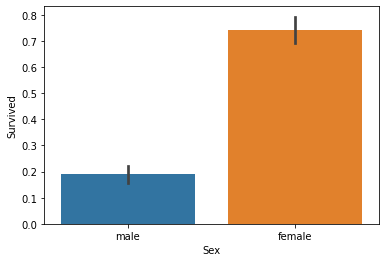

In [6]:
sns.barplot(x='Sex', y='Survived', data=titan_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

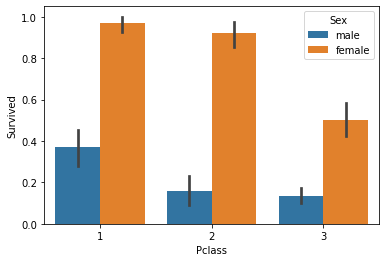

In [7]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titan_df)

In [8]:
# 확인해보니 y값이 범주형 :: y값이 int란 말~! 
titan_df.Survived

## 아~ Classifier를 쓰겠구나 -> 아하... label_encoding 써도 되네???

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [9]:
# 결측값, Age, Cabin, Embarked
def fillna_null(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True) # 원본을 변형하는 inplace true 적용
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    
    return df

In [10]:
# label encoding을 위한 object 확인
titan_df.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [11]:
# label encoding
from sklearn.preprocessing import LabelEncoder

def le_encode(df):
    features = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
    for ftr in features:
        le = LabelEncoder() # le로 객체화
        le=le.fit(df[ftr])
        df[ftr]=le.transform(df[ftr])
    return df

In [12]:
# ML알고리즘에 불필요 속성(attr: columns) 제거
# 'Ticket', 'Name','PassengerId', 'Cabin', 'Embarked' 컬럼들 삭제
def drop_ftr(df):
    df.drop(['Ticket', 'Name','PassengerId', 'Cabin', 'Embarked'], axis=1, inplace=True)
    return df

In [13]:
# 위에서 생성한 함수들을 하나로 합친다.
def preprocessing_ftrs(df):
    df = fillna_null(df)
    df = le_encode(df)
    df = drop_ftr(df)
    return df

In [14]:
# 원본 데이터 재로딩
titan_train = pd.read_csv('D:/pythonTest/train.csv') # train
titan_test_X = pd.read_csv('D:/pythonTest/test.csv') # X_test

In [15]:
titan_X = titan_train.drop(['Survived'], axis=1)
titan_y = titan_train['Survived']

In [16]:
# 앞에서 생성했었던 함수를 적용하여
# 전처리 진행 :: train_X- titan_X
preprocessing_ftrs(titan_X)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,7.2500
1,1,0,38.000000,1,0,71.2833
2,3,0,26.000000,0,0,7.9250
3,1,0,35.000000,1,0,53.1000
4,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000
887,1,0,19.000000,0,0,30.0000
888,3,0,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [31]:
# 전처리 진행 2 -- titan_test_X
preprocessing_ftrs(titan_test_X)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.50000,0,0,7.8292
1,3,0,47.00000,1,0,7.0000
2,2,1,62.00000,0,0,9.6875
3,3,1,27.00000,0,0,8.6625
4,3,0,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500
414,1,0,39.00000,0,0,108.9000
415,3,1,38.50000,0,0,7.2500
416,3,1,30.27259,0,0,8.0500


In [40]:
# 데이터 분할
X_train, X_val, y_train, y_val =train_test_split(titan_X, titan_y, random_state=11)


# 의사결정나무, 랜덤포레스트, 로지스틱 회귀 객체화
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(random_state=11)

# 각 알고리즘별 학습 및 평가-1
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_val)
print('dt_clf의 정확도:', np.round(accuracy_score(y_val,dt_pred),3))

# 각 알고리즘별 학습 및 평가-2
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_val)
print('rf_clf의 정확도:', np.round(accuracy_score(y_val,rf_pred),3))

# 각 알고리즘별 학습 및 평가-3
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_val)
print('lr_clf의 정확도:', np.round(accuracy_score(y_val,lr_pred),3))

dt_clf의 정확도: 0.816
rf_clf의 정확도: 0.83
lr_clf의 정확도: 0.843


In [46]:
# dt_cv :: cross_val_score
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(dt_clf,titan_X,titan_y,cv=7)
for n_iter, acc_res in enumerate(scores_dt):
    print('{0}번째 CV 정확도:{1:.3f}'.format(n_iter, acc_res))
    
print('평균 CV정확도', np.round(np.mean(scores_dt),4))

0번째 CV 정확도:0.695
1번째 CV 정확도:0.758
2번째 CV 정확도:0.787
3번째 CV 정확도:0.803
4번째 CV 정확도:0.819
5번째 CV 정확도:0.764
6번째 CV 정확도:0.811
평균 CV정확도 0.7768


In [47]:
# rf_cv :: cross_val_score
from sklearn.model_selection import cross_val_score

scores_rf = cross_val_score(rf_clf,titan_X,titan_y,cv=7)
for n_iter, acc_res in enumerate(scores_rf):
    print('{0}번째 CV 정확도:{1:.3f}'.format(n_iter, acc_res))
    
print('평균 CV정확도', np.round(np.mean(scores_rf),4))

0번째 CV 정확도:0.727
1번째 CV 정확도:0.797
2번째 CV 정확도:0.827
3번째 CV 정확도:0.866
4번째 CV 정확도:0.827
5번째 CV 정확도:0.803
6번째 CV 정확도:0.858
평균 CV정확도 0.8149


In [48]:
# lr_cv :: cross_val_score
from sklearn.model_selection import cross_val_score

scores_lr = cross_val_score(lr_clf,titan_X,titan_y,cv=7)
for n_iter, acc_res in enumerate(scores_lr):
    print('{0}번째 CV 정확도:{1:.3f}'.format(n_iter, acc_res))
    
print('평균 CV정확도', np.round(np.mean(scores_lr),4))

0번째 CV 정확도:0.766
1번째 CV 정확도:0.797
2번째 CV 정확도:0.803
3번째 CV 정확도:0.772
4번째 CV 정확도:0.780
5번째 CV 정확도:0.772
6번째 CV 정확도:0.827
평균 CV정확도 0.7879


In [61]:
# 하이퍼파라미터 튜닝 한 번 진행- dt :: gridsearchCV

from sklearn.model_selection import GridSearchCV

params_d1 = {'max_depth':[2,3,5,10],
            'min_samples_split':[2,3,5],
            'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf,param_grid=params_d1,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train) #grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))

best_dclf=grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_val)#dpredictions = best_dclf.predict(X_test)
accuracy=accuracy_score(y_val,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8084
테스트 세트에서의 DecisionTreeClassifier 정확도:0.8700


최적화된 하이퍼 파라미터인 max_depth=3, min_samples_leaf=1, min_samples_split:2로 DecisionTreeClassifier를 학습시킨 뒤 예측 정확도가 약 87.15%로 향상되었다. 하이퍼 파라미터 변경 전보다 약 8% 이상이 증가했는데, 일반적으로 하이퍼 파라미터를 튜닝하더라도 이 정도 수준으로 증가하기는 매우 어렵다. 테스트용 데이터 세트가 작기에 수치상으로 예측 성능이 많이 증가한 것처럼 보인다. 

In [58]:
## 위의 결과를 토대로 rf_clf가 가장 성능이 좋은 알고리즘임을 확인
## 전체의 데이터로 학습

# ㅠ.ㅠ titan_test_X :: 즉 test_X데이터에만 fare의 결측치가 존재
# 전처리 한 번 더
titan_test_X['Fare'] = titan_test_X['Fare'].fillna(titan_test_X['Fare'].mean())

### ㅠ.ㅠ 다시 학습
rf_clf.fit(titan_X,titan_y) ## 두 가지 전부 전체의 데이터의 X와 y입니다.
rf_clf.predict(titan_test_X)

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,